In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
pd.options.display.max_columns = None

In [3]:
kdp = pd.read_csv("kidney_disease.csv")

In [4]:
kdp

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
kdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
kdp["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [7]:
kdp.shape

(400, 26)

In [8]:
kdp.drop("id", axis=1, inplace=True)

In [9]:
kdp.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
kdp.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [11]:
kdp["pcv"] = pd.to_numeric(kdp['pcv'], errors = 'coerce')
kdp["wc"] = pd.to_numeric(kdp['wc'], errors = 'coerce')
kdp["rc"] = pd.to_numeric(kdp['rc'], errors = 'coerce')

In [12]:
kdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [13]:
kdp.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [14]:
cat_cols = [col for col in kdp.columns if kdp[col].dtypes == "object"]
num_cols = [col for col in kdp.columns if kdp[col].dtypes != "object"]

In [15]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [16]:
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [17]:
for col in cat_cols:
    print(f"{col} has {kdp[col].unique()}")

rbc has [nan 'normal' 'abnormal']
pc has ['normal' 'abnormal' nan]
pcc has ['notpresent' 'present' nan]
ba has ['notpresent' 'present' nan]
htn has ['yes' 'no' nan]
dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad has ['no' 'yes' '\tno' nan]
appet has ['good' 'poor' nan]
pe has ['no' 'yes' nan]
ane has ['no' 'yes' nan]
classification has ['ckd' 'ckd\t' 'notckd']


In [18]:
kdp["dm"].replace(to_replace = {'\tno' : 'no', '\tyes' : 'yes', ' yes' : 'yes'}, inplace = True)
kdp["cad"] = kdp["cad"].replace(to_replace = '\tno', value = 'no')
kdp["classification"] = kdp["classification"].replace(to_replace = {'ckd\t' : 'ckd', 'notckd' : 'not ckd'})

In [19]:
for col in cat_cols:
    print(f"{col} has {kdp[col].unique()}")

rbc has [nan 'normal' 'abnormal']
pc has ['normal' 'abnormal' nan]
pcc has ['notpresent' 'present' nan]
ba has ['notpresent' 'present' nan]
htn has ['yes' 'no' nan]
dm has ['yes' 'no' nan]
cad has ['no' 'yes' nan]
appet has ['good' 'poor' nan]
pe has ['no' 'yes' nan]
ane has ['no' 'yes' nan]
classification has ['ckd' 'not ckd']


In [20]:
cols = ['dm', 'cad', 'classification']
for col in cols:
    print(f"{col} has {kdp[col].unique()}")

dm has ['yes' 'no' nan]
cad has ['no' 'yes' nan]
classification has ['ckd' 'not ckd']


In [21]:
kdp['classification'] = kdp['classification'].map({'ckd': 0, 'not ckd': 1})
kdp["classification"] = pd.to_numeric(kdp["classification"], errors = "coerce")

In [22]:
cols = ['dm', 'cad', 'classification']
for col in cols:
    print(f"{col} has {kdp[col].unique()}")

dm has ['yes' 'no' nan]
cad has ['no' 'yes' nan]
classification has [0 1]


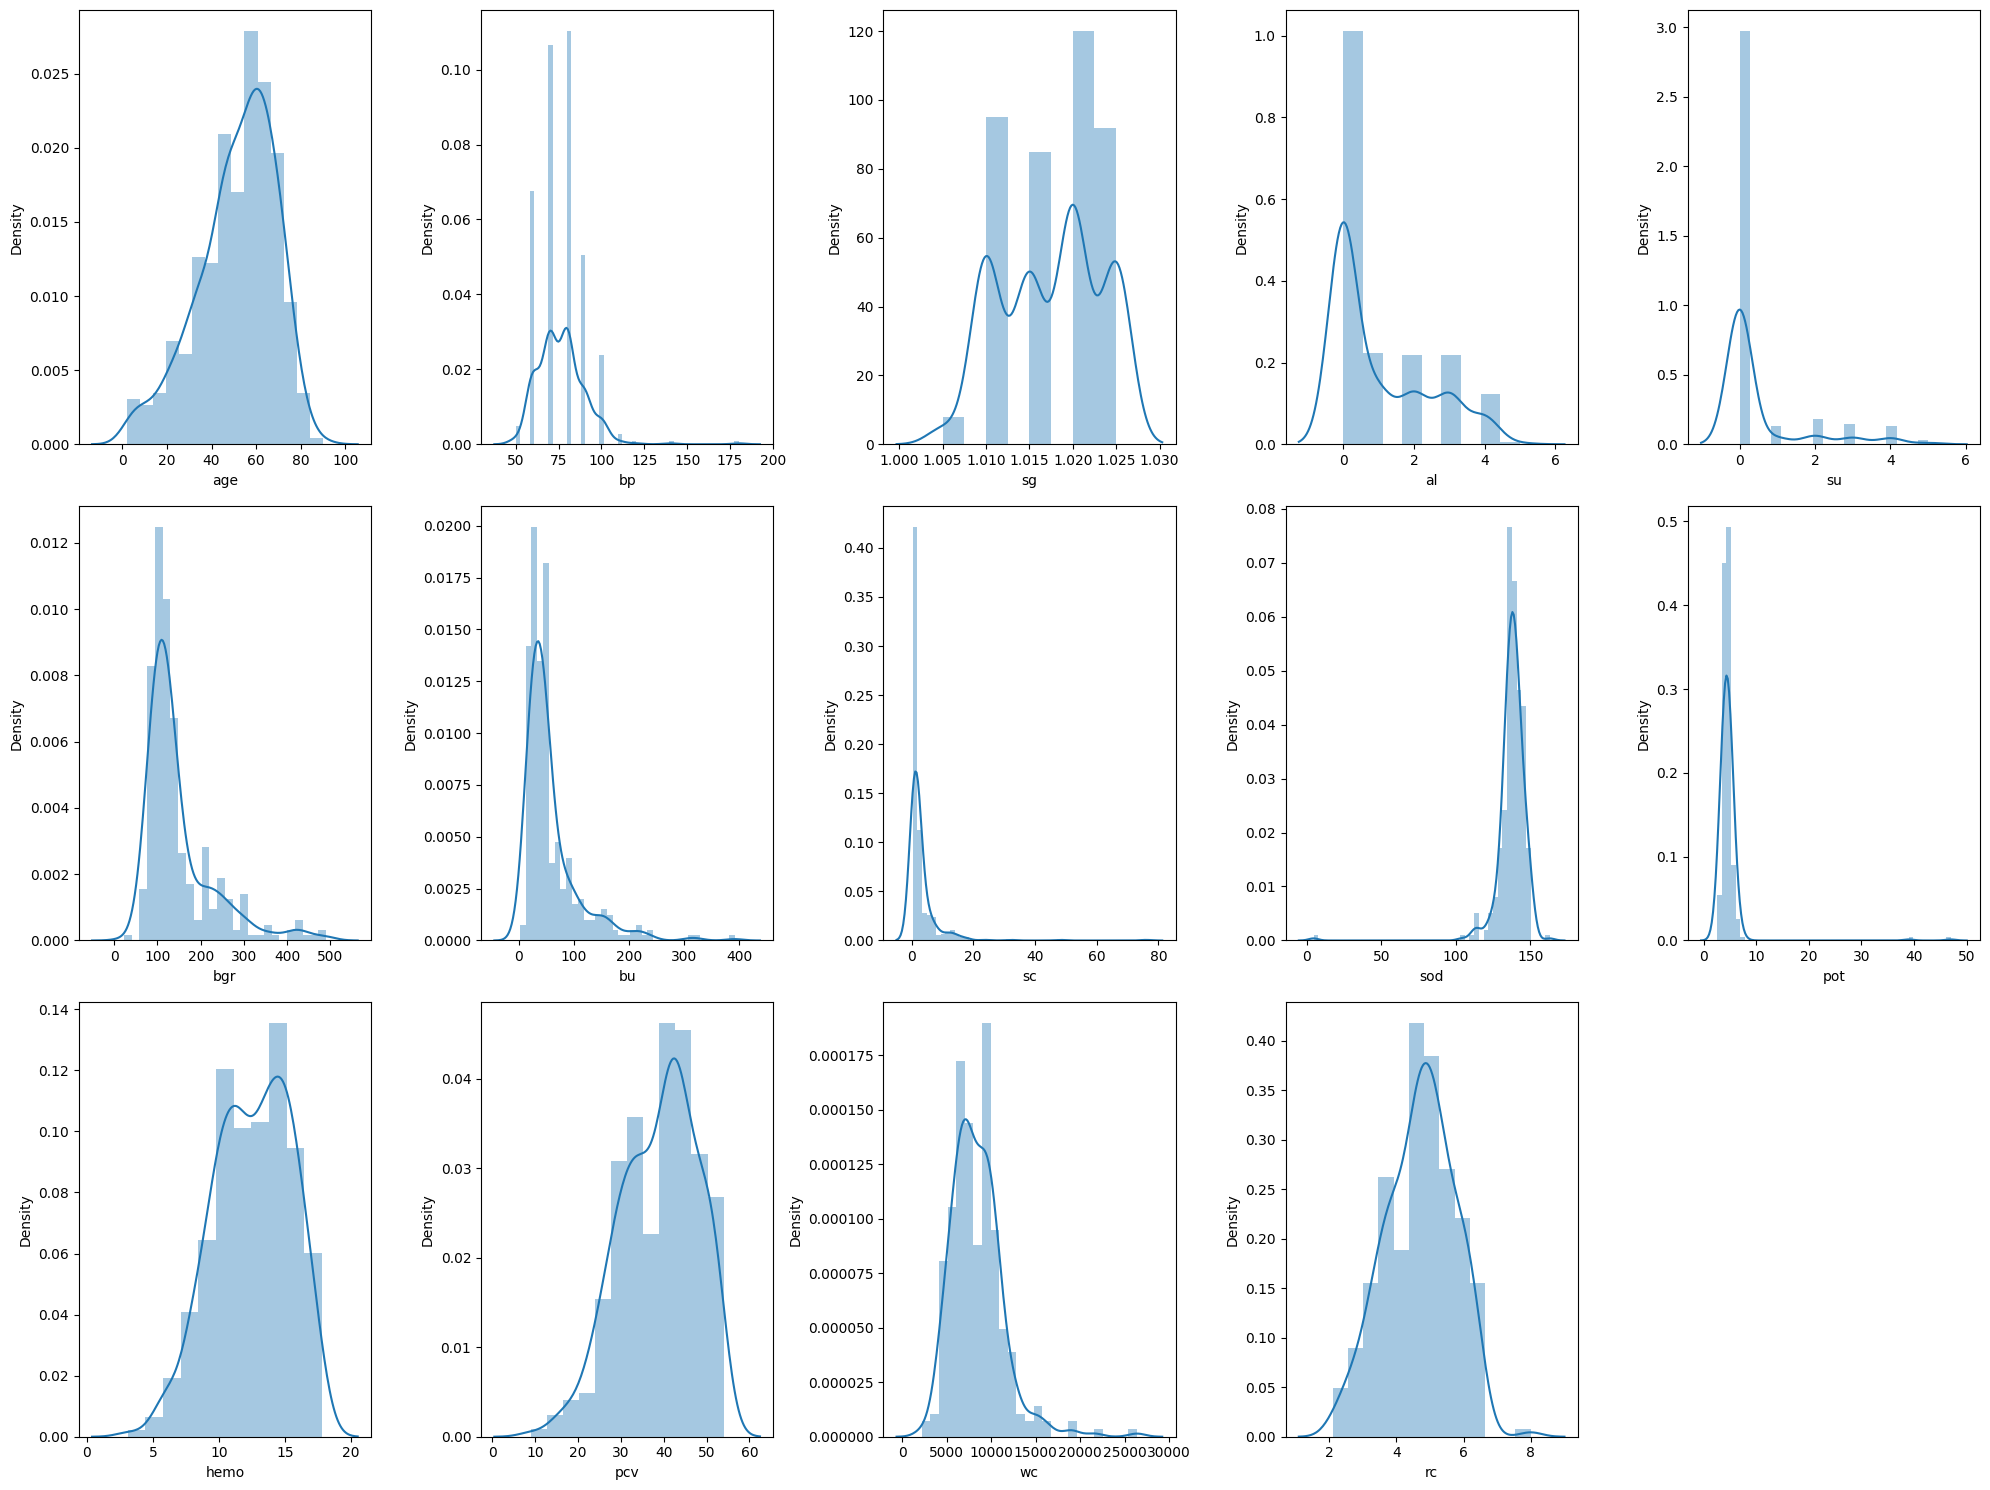

In [23]:
plt.figure(figsize = (20,15))
plotnumber = 1
for column in num_cols:
    if plotnumber<=14:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(kdp[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [24]:
'''plt.figure(figsize = (20 , 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(kdp[column], palette = 'rocket')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()'''

"plt.figure(figsize = (20 , 15))\nplotnumber = 1\nfor column in cat_cols:\n    if plotnumber <= 14:\n        ax = plt.subplot(3, 5, plotnumber)\n        sns.countplot(kdp[column], palette = 'rocket')\n        plt.xlabel(column)\n    plotnumber += 1\nplt.tight_layout()\nplt.show()"

In [25]:
kdp.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,-0.227268
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,-0.294077
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,0.732163
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,-0.627090
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,-0.344070
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,-0.419672
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,-0.380605
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,-0.299969
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,0.375674
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,-0.084541


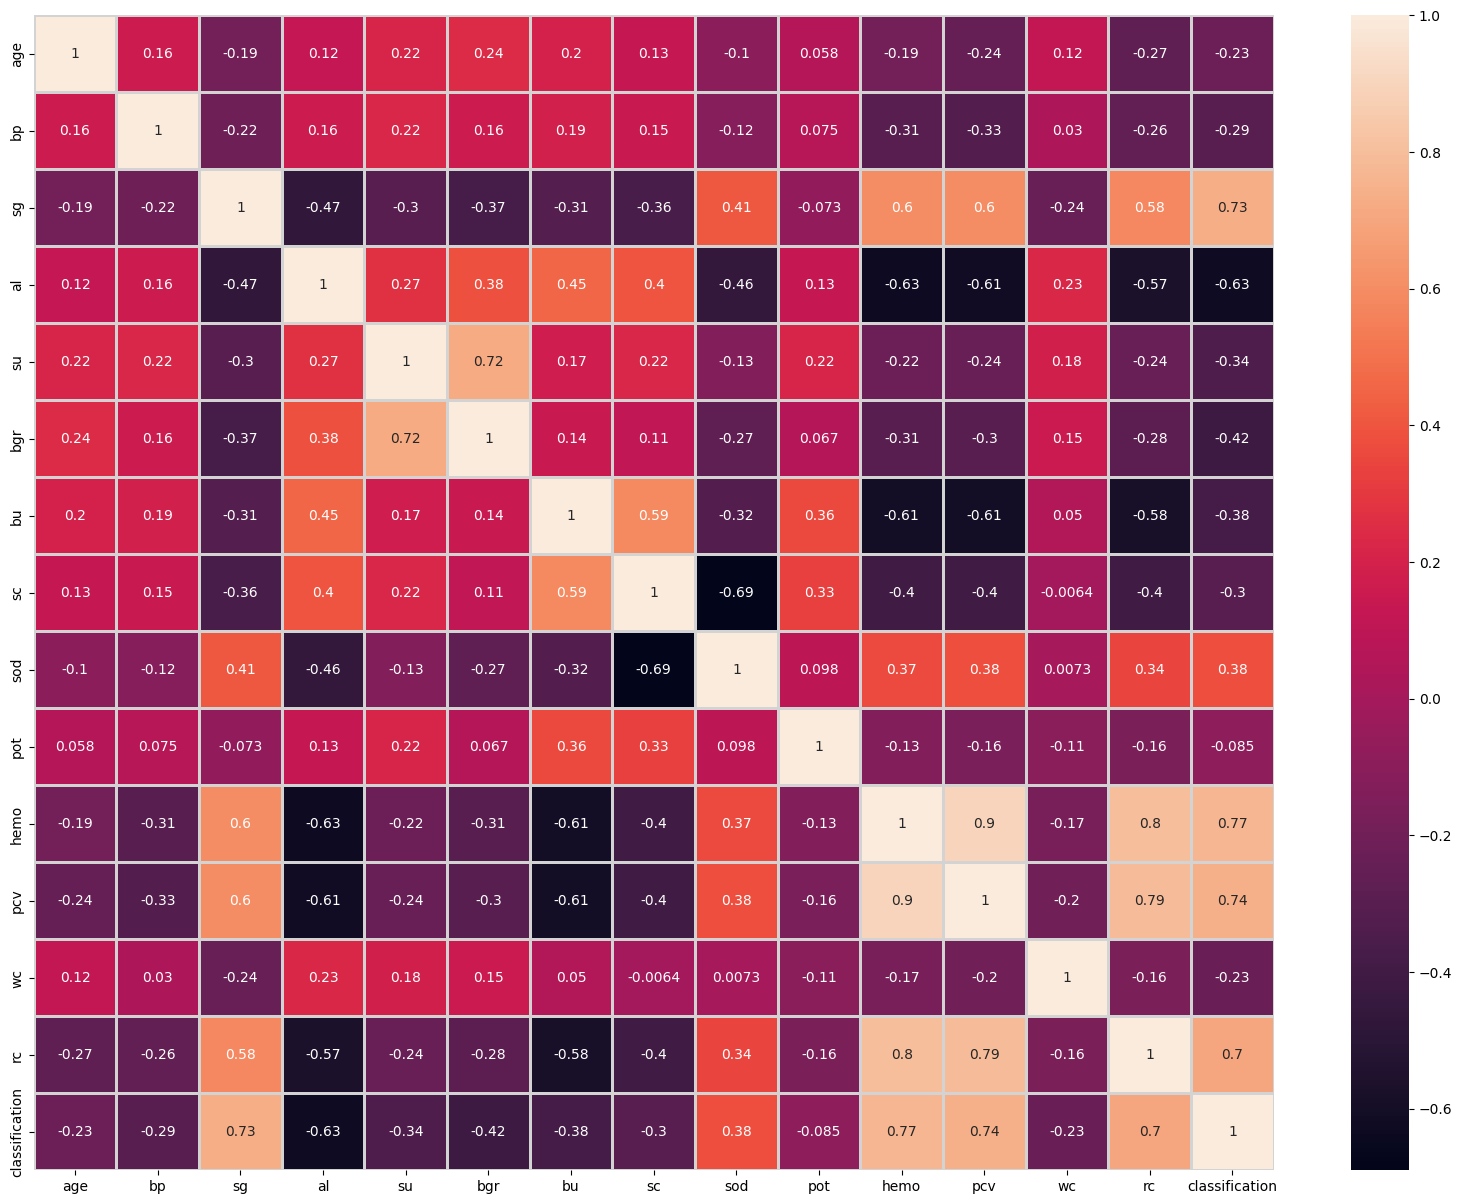

In [26]:
plt.figure(figsize = (20,15))
sns.heatmap(kdp.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

## EDA

In [27]:
def voilin(col):
    px.violin(kdp, y=col, x = 'classification', box = True, template = 'plotly_dark')
    return fig.show()
def kde(col):
    grid = sns.FacetGrid(kdp, hue = 'classification', height = 6, aspect = 2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter_plot(col1,col2):
    fig = px.scatter(kdp, x = col1, y = col2, color = 'classification', template = 'plotly_dark')
    return fig.show()
    
    

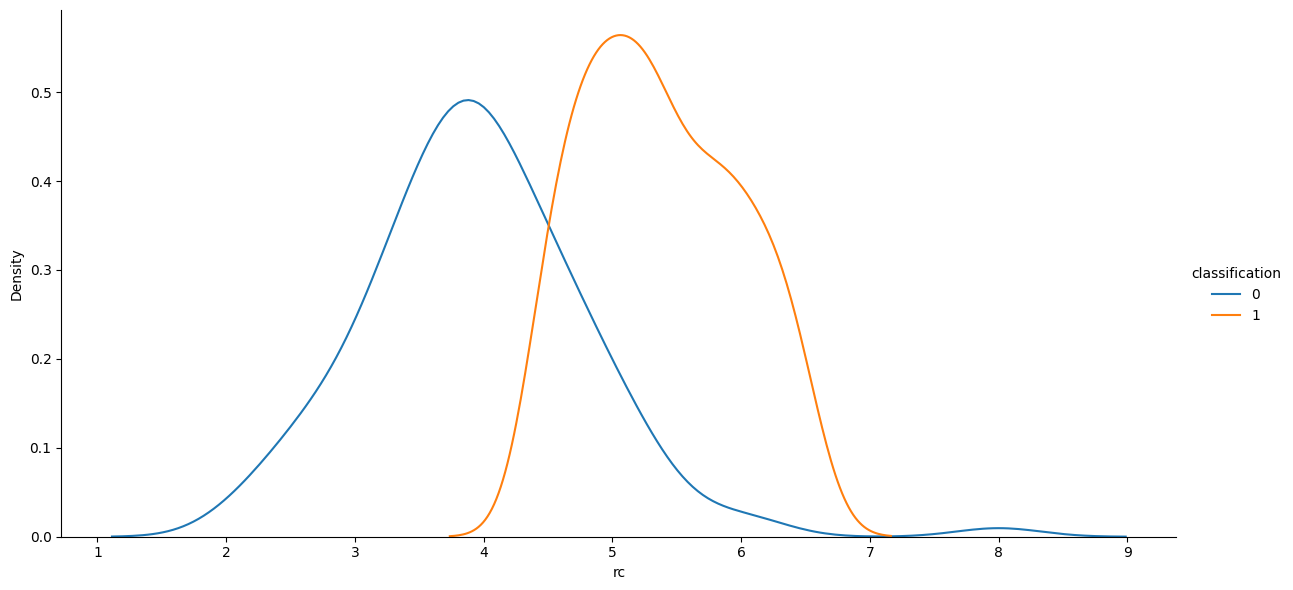

In [28]:
kde('rc')

## Data Preprocessing

In [29]:
# Checking for missing values
kdp.isnull().sum().sort_values(ascending = False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [30]:
kdp[num_cols].isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

In [31]:
kdp[cat_cols].isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [32]:
kdp.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [33]:
# Two method to fill null values
# 01. random sampling -> higer null values
# 02. mean/mode -> lower null values

In [34]:
def random_sampling(features):
    random_sample = kdp[features].dropna().sample(kdp[features].isnull().sum())
    random_sample.index = kdp[kdp[features].isnull()].index
    kdp.loc[kdp[features].isnull(), features] = random_sample

def impute_mode(feature):
    mode = kdp[feature].mode()[0]
    kdp[feature] = kdp[feature].fillna(mode)

In [35]:
#
for col in num_cols:
    random_sampling(col)

In [36]:
kdp[num_cols].isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [37]:
random_sampling('rbc')
random_sampling('pc')
for col in cat_cols:
    impute_mode(col)

In [38]:
kdp[cat_cols].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## Featuure Encoding

In [39]:
for col in cat_cols:
    print(f"{col} has {kdp[col].nunique()}")

rbc has 2
pc has 2
pcc has 2
ba has 2
htn has 2
dm has 2
cad has 2
appet has 2
pe has 2
ane has 2
classification has 2


## Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    kdp[col] = le.fit_transform(kdp[col])

In [41]:
kdp.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,135.0,5.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,130.0,18.0,0.8,124.0,3.4,11.3,38.0,6000.0,5.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,163.0,5.7,9.6,31.0,7500.0,5.6,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,135.0,4.3,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


## Model Building

In [42]:
X = kdp.drop('classification', axis=1)
y = kdp['classification']

In [43]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,135.0,5.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,130.0,18.0,0.8,124.0,3.4,11.3,38.0,6000.0,5.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,163.0,5.7,9.6,31.0,7500.0,5.6,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,135.0,4.3,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [44]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Traning Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, knn.predict(X_test))}")

print(f"Confusion Matrix of KNN is \n {confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report of KNN is \n {classification_report(y_test, knn.predict(X_test))}\n")



Traning Accuracy of KNN is 0.809375
Testing Accuracy of KNN is 0.6875
Confusion Matrix of KNN is 
 [[32 20]
 [ 5 23]]

Classification Report of KNN is 
               precision    recall  f1-score   support

           0       0.86      0.62      0.72        52
           1       0.53      0.82      0.65        28

    accuracy                           0.69        80
   macro avg       0.70      0.72      0.68        80
weighted avg       0.75      0.69      0.69        80




## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Traning Accuracy of Decision Tree is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of Decision Tree is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of Decision Tree is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of Decision Tree is \n {classification_report(y_test, dtc.predict(X_test))}\n")

Traning Accuracy of Decision Tree is 1.0
Testing Accuracy of Decision Tree is 0.9625
Confusion Matrix of Decision Tree is 
 [[50  2]
 [ 1 27]]

Classification Report of Decision Tree is 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.93      0.96      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80




## Hyper Parameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7,10],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1,2,3,4,5],
    'min_samples_split': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, GRID_PARAMETER, cv=5, n_jobs=-1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

##  Best Parameter and Best Score

In [50]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 1, 'splitter': 'random'}
0.978125


In [51]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Traning Accuracy of Decision Tree is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of Decision Tree is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of Decision Tree is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of Decision Tree is \n {classification_report(y_test, dtc.predict(X_test))}\n")

Traning Accuracy of Decision Tree is 0.975
Testing Accuracy of Decision Tree is 0.9875
Confusion Matrix of Decision Tree is 
 [[52  0]
 [ 1 27]]

Classification Report of Decision Tree is 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80




## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rand_clf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 7, n_estimators = 400 )
rand_clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [54]:
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(f"Traning Accuracy of Random Forest is {accuracy_score(y_train, rand_clf.predict(X_train))}")
print(f"Testing Accuracy of Random Forest is {accuracy_score(y_test, rand_clf.predict(X_test))}")

print(f"Confusion Matrix of Random Forest is \n {confusion_matrix(y_test, rand_clf.predict(X_test))}\n")
print(f"Classification Report of Random Forest is \n {classification_report(y_test, rand_clf.predict(X_test))}\n")



Traning Accuracy of Random Forest is 1.0
Testing Accuracy of Random Forest is 0.9875
Confusion Matrix of Random Forest is 
 [[52  0]
 [ 1 27]]

Classification Report of Random Forest is 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80




## XG Boost Classifier

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(objective = "binary_logistic", learning_rate = 0.001, max_depth = 10, n_estimators = 100)


In [57]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Traning Accuracy of XGBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Testing Accuracy of XGBoost is {accuracy_score(y_test, xgb.predict(X_test))}")

print(f"Confusion Matrix of XGBoost is \n {confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report of XGBoost is \n {classification_report(y_test, xgb.predict(X_test))}\n")

Traning Accuracy of XGBoost is 1.0
Testing Accuracy of XGBoost is 0.975
Confusion Matrix of XGBoost is 
 [[51  1]
 [ 1 27]]

Classification Report of XGBoost is 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80




## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [59]:
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Traning Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Testing Accuracy of Logistic Regression is {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Confusion Matrix of Logistic Regression is \n {confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f"Classification Report of Logistic Regression is \n {classification_report(y_test, lr.predict(X_test))}\n")

Traning Accuracy of Logistic Regression is 0.896875
Testing Accuracy of Logistic Regression is 0.9125
Confusion Matrix of Logistic Regression is 
 [[48  4]
 [ 3 25]]

Classification Report of Logistic Regression is 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80




## SVM

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [61]:
svm = SVC(probability = True)
parameter = {
    
    'gamma' : [0.0001,0.001,0.01,0.1],
    'C' : [0.01,0.05,0.5,0.1,1,10,100]
}

grid_search_svm = GridSearchCV(svm, parameter)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [62]:
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

{'C': 10, 'gamma': 0.001}
0.765625


In [63]:
svm = SVC(gamma = 0.1, C = 10, probability = True)
svm.fit(X_train, y_train)


SVC(C=10, gamma=0.1, probability=True)

In [64]:
svm_acc = accuracy_score(y_test, svm.predict(X_test))
print(f"Traning Accuracy of SVM is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Testing Accuracy of SVM is {accuracy_score(y_test, svm.predict(X_test))}")

print(f"Confusion Matrix of SVM is \n {confusion_matrix(y_test, svm.predict(X_test))}\n")
print(f"Classification Report of SVM is \n {classification_report(y_test, svm.predict(X_test))}\n")

Traning Accuracy of SVM is 1.0
Testing Accuracy of SVM is 0.65
Confusion Matrix of SVM is 
 [[52  0]
 [28  0]]

Classification Report of SVM is 
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80




## Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
gbc = GradientBoostingClassifier()

PARAMETERS = {
    
    'loss' :['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'n_estimators' :[100,150,180,200]
    
}

grid_search_gbc = GridSearchCV(gbc, PARAMETERS, cv=5, n_jobs=-1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [67]:
print(grid_search_gbc.best_params_)
print(grid_search_gbc.best_score_)

{'learning_rate': 1, 'loss': 'log_loss', 'n_estimators': 100}
0.978125


In [68]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'log_loss', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [69]:
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(f"Traning Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Testing Accuracy of Gradient Boosting Classifier is {accuracy_score(y_test, gbc.predict(X_test))}")

print(f"Confusion Matrix of Gradient Boosting Classifier is \n {confusion_matrix(y_test, gbc.predict(X_test))}\n")
print(f"Classification Report of Gradient Boosting Classifier is \n {classification_report(y_test, gbc.predict(X_test))}\n")

Traning Accuracy of Gradient Boosting Classifier is 1.0
Testing Accuracy of Gradient Boosting Classifier is 0.975
Confusion Matrix of Gradient Boosting Classifier is 
 [[51  1]
 [ 1 27]]

Classification Report of Gradient Boosting Classifier is 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80




## Model Comparison

In [70]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression', 'SVM', 'Gradient Boosting Classifier'],
    'Score' : [knn_acc, dtc_acc, rand_clf_acc, xgb_acc, lr_acc, svm_acc, gbc_acc]
    
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree,0.9875
2,Random Forest,0.9875
3,XGBoost,0.9750
6,Gradient Boosting Classifier,0.9750
4,Logistic Regression,0.9125
0,KNN,0.6875
5,SVM,0.6500


In [71]:
import pickle
model = rand_clf
pickle.dump(model, open("kidney.pkl", 'wb'))

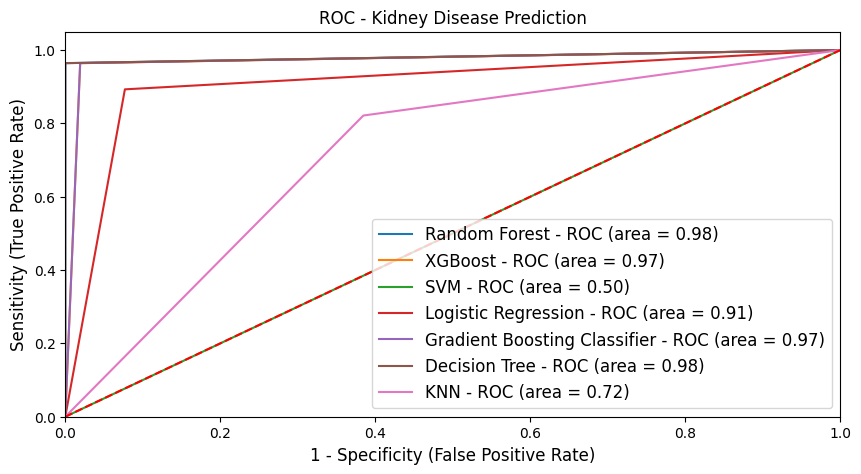

In [72]:
from sklearn import metrics
plt.figure(figsize=(10,5))
models = [
    {
        'label': 'Random Forest',
        'model': rand_clf,
    },
    {
        'label': 'XGBoost',
        'model': xgb,
    },
    {
        'label': 'SVM',
        'model': svm,
    },
    {
        'label': 'Logistic Regression',
        'model': lr,
    },
    {
        'label': 'Gradient Boosting Classifier',
        'model': gbc,
    },
    {
        'label': 'Decision Tree',
        'model': dtc,
    },
    {
        'label': 'KNN',
        'model': knn,
    }
    
]
for m in models:
    model = m['model']
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test,  y_pred, pos_label=1)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr1,tpr1,label= '%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12) 
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize= 12)
plt.savefig('roc-kidney.jpeg', format = "jpeg", dpi = 400, bbox_inches = 'tight')
plt.show()

[68.75, 98.75, 98.75, 97.5, 91.25, 65.0, 97.5]
[98.21, 97.25, 50.0, 90.8, 97.25, 96.28999999999999, 71.84]


([<matplotlib.axis.XTick at 0x1d8b3e214b0>,
 [Text(0.35, 0, 'Random Forest'),
  Text(1.35, 0, 'XGBoost'),
  Text(2.35, 0, 'SVM'),
  Text(3.35, 0, 'Logistic Regression'),
  Text(4.35, 0, 'Gradient Boosting Classifier'),
  Text(5.35, 0, 'Decision Tree'),
  Text(6.35, 0, 'KNN')])

<Figure size 2000x1500 with 0 Axes>

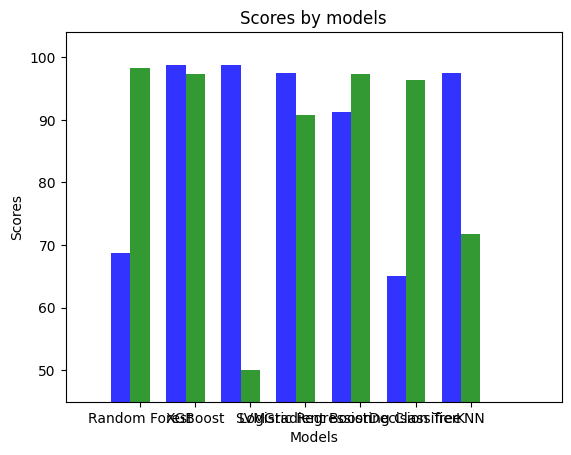

In [77]:
plt.figure(figsize = (20,15))
models = [
    {
        'label': 'Random Forest',
        'model': rand_clf,
    },
    {
        'label': 'XGBoost',
        'model': xgb,
    },
    {
        'label': 'SVM',
        'model': svm,
    },
    {
        'label': 'Logistic Regression',
        'model': lr,
    },
    {
        'label': 'Gradient Boosting Classifier',
        'model': gbc,
    },
    {
        'label': 'Decision Tree',
        'model': dtc,
    },
    {
        'label': 'KNN',
        'model': knn,
    }
    
]

means_roc = []
means_accuracy = [100*round(knn_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4), 100*round(xgb_acc,4), 
                  100*round(lr_acc,4), 100*round(svm_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr1 ,tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='b',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='g',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([45, 104])

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Scores by models')
plt.xticks(index + bar_width, ('Random Forest', 'XGBoost', 'SVM', 'Logistic Regression', 'Gradient Boosting Classifier', 'Decision Tree', 'KNN'))


[91.25, 98.75, 65.0, 68.75, 97.5, 98.75, 97.5]
[90.8, 98.08, 50.0, 71.84, 97.25, 98.21, 97.25]


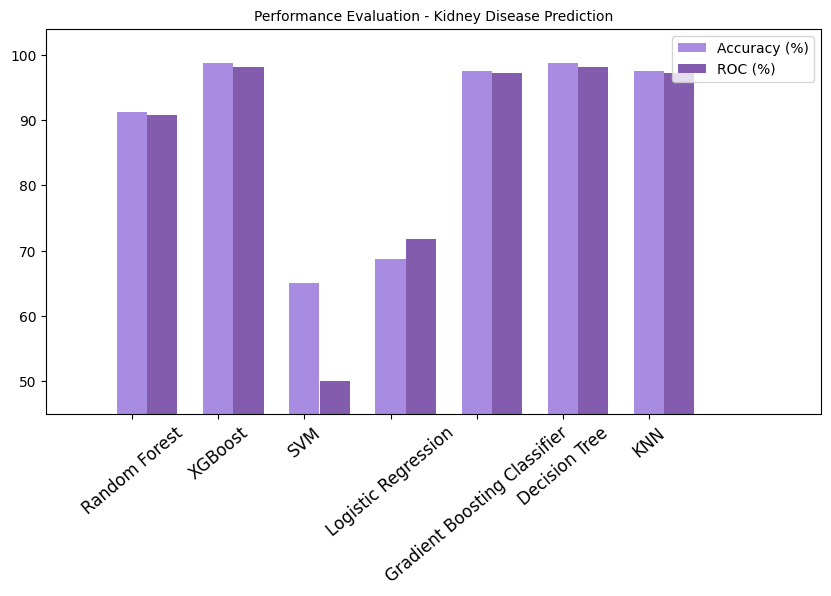

In [80]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svm_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)


n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)


fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([45, 104])

plt.title('Performance Evaluation - Kidney Disease Prediction', fontsize=10)
plt.xticks(index, ('Random Forest', 'XGBoost', 'SVM', 'Logistic Regression', 'Gradient Boosting Classifier', 'Decision Tree', 'KNN'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()